<a href="https://colab.research.google.com/github/mariabandeira/Reconhecimento-de-Digitos/blob/main/MiniProjeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento de Dígitos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

test_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/test_redu.csv'
train_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/train_redu.csv'

train_redu = pd.read_csv(train_redu_path, sep=';')
test_redu = pd.read_csv(test_redu_path, sep=';')

# 3.3. Classificador de dígitos completo

In [2]:
# normalização para PLA e Regressão Logística
scaler = MinMaxScaler()

train_redu_scaled = scaler.fit_transform(train_redu.drop('label', axis=1)) # ajusta e transforma
test_redu_scaled = scaler.transform(test_redu.drop('label', axis=1)) # apenas transforma (faz com que não haja vazamento de dados)

train_redu['i_normalizada'] = train_redu_scaled[:,0]
train_redu['s_normalizada'] = train_redu_scaled[:,1]

test_redu['i_normalizada'] = test_redu_scaled[:,0]
test_redu['s_normalizada'] = test_redu_scaled[:,1]

In [3]:
X_train0_lin = train_redu[['intensidade', 'simetria']].values
y_train0_lin = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_lin = test_redu[['intensidade', 'simetria']].values
y_test0_lin = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])

## Regressão Linear

In [4]:
class LinearRegression:
  def __init__(self):
    self.w = None

  def fit(self, _X, _y):
    N = len(_X)

    X = np.column_stack((np.ones((N, 1)), _X))

    xtx = X.T @ X
    inv = np.linalg.inv(xtx) @ X.T
    self.w = inv @ _y

  def predict(self, _x):
    X = np.column_stack((np.ones((len(_x), 1)), _x))
    return [np.dot(self.w, xn) for xn in X]

  def getW(self):
    return self.w

In [5]:
class LRClassifier():
  def execute(self, _X, _y):
    lr = LinearRegression()
    lr.fit(_X, _y)
    self.w = lr.getW()

  def predict(self, X):
    N = len(X)
    X = np.column_stack((np.ones((N, 1)), X))
    return [np.sign(np.dot(self.w, xn)) for xn in X]

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [6]:
classifier0 = LRClassifier()
classifier0.execute(X_train0_lin, y_train0_lin)
predictions = classifier0.predict(X_train0_lin)

In [7]:
lr0 = LinearRegression()
lr0.fit(X_train0_lin, y_train0_lin)
y_pred = np.array(lr0.predict(X_train0_lin))
w = lr0.getW()
print(w)

[-2.23739689  0.0254455  -0.0066963 ]


In [8]:
y_pred = np.where(y_pred >= 0, 1, -1)
y_pred

array([ 1, -1,  1, ..., -1, -1, -1])

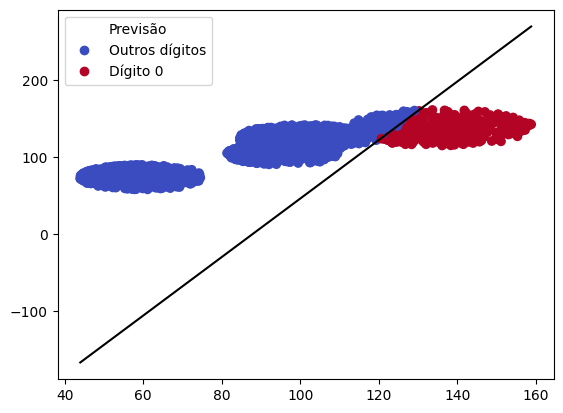

In [9]:
# Plotagem da Regressão Linear com LRClassifier
scatter = plt.scatter(X_train0_lin[:, 0], X_train0_lin[:, 1], c=y_pred, cmap='coolwarm')

x = np.linspace(X_train0_lin[:, 0].min(), X_train0_lin[:, 0].max(), 100)
y = classifier0.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 0'], title='Previsão')
plt.show()

In [10]:
y_pred.tolist().count(1)

322

In [11]:
len(y_pred)

2186

In [12]:
1744+322

2066

In [13]:
# remover de train_redu os dados que não tem y_pred = -1
indices_to_keep = []
for i in range(len(train_redu)):
  if(y_pred[i] == -1):
    indices_to_keep.append(i)

train_redu_0 = train_redu.iloc[indices_to_keep]

len(train_redu_0)

1864

In [14]:
X_train1_lin = train_redu_0[['intensidade', 'simetria']].values
y_train1_lin = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0['label']])

In [15]:
classifier1 = LRClassifier()
classifier1.execute(X_train1_lin, y_train1_lin)
predictions = classifier1.predict(X_train1_lin)

lr1 = LinearRegression()
lr1.fit(X_train1_lin, y_train1_lin)
y_pred1 = np.array(lr1.predict(X_train1_lin))
w = lr1.getW()
print(w)

[ 3.13153492 -0.03004819 -0.00898044]


In [16]:
y_pred1 = np.where(y_pred1 >= 0, 1, -1)
y_pred1

array([-1, -1, -1, ..., -1, -1, -1])

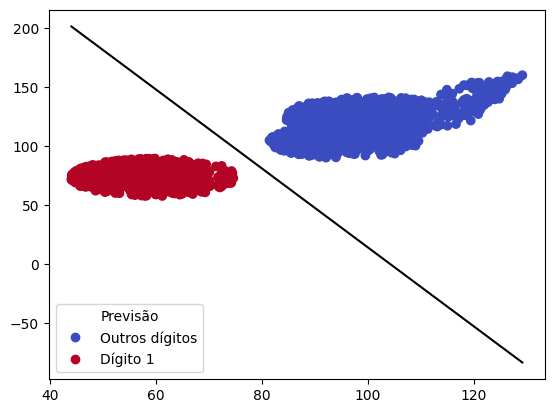

In [17]:
# Plotagem da Regressão Linear com LRClassifier
plt.scatter(X_train1_lin[:, 0], X_train1_lin[:, 1], c=y_pred1, cmap='coolwarm')

x = np.linspace(X_train1_lin[:, 0].min(), X_train1_lin[:, 0].max(), 100)
y = classifier1.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Outros dígitos', 'Dígito 1'], title='Previsão')
plt.show()

In [18]:
# remover de train_redu os dados que não tem y_pred = -1
indices_to_keep = []
for i in range(len(train_redu_0)):
  if(y_pred1[i] == -1):
    indices_to_keep.append(i)

train_redu_1 = train_redu_0.iloc[indices_to_keep]

len(train_redu_1)

1256

In [19]:
X_train4_lin = train_redu_1[['intensidade', 'simetria']].values
y_train4_lin = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1['label']])

In [20]:
classifier4 = LRClassifier()
classifier4.execute(X_train4_lin, y_train4_lin)
predictions = classifier4.predict(X_train4_lin)

lr4 = LinearRegression()
lr4.fit(X_train4_lin, y_train4_lin)
y_pred4 = np.array(lr4.predict(X_train4_lin))
w = lr4.getW()
print(w)

[ 6.07307683e+00  6.06019786e-03 -5.70824398e-02]


In [21]:
y_pred4 = np.where(y_pred4 >= 0, 1, -1)
y_pred4

array([-1, -1, -1, ..., -1, -1, -1])

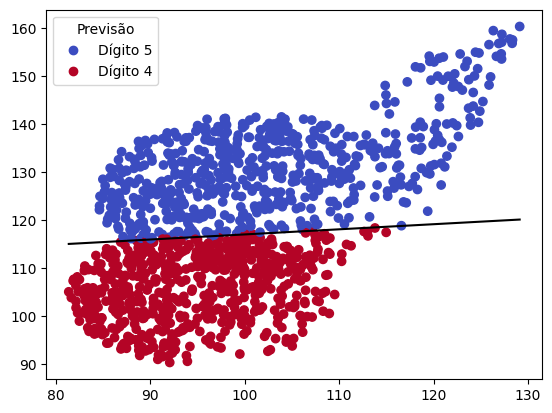

In [22]:
# Plotagem da Regressão Linear com LRClassifier
plt.scatter(X_train4_lin[:, 0], X_train4_lin[:, 1], c=y_pred4, cmap='coolwarm')

x = np.linspace(X_train4_lin[:, 0].min(), X_train4_lin[:, 0].max(), 100)
y = classifier4.getRegressionY(x)

plt.plot(x, y, color='black')
handles, labels = scatter.legend_elements()
plt.legend(handles, ['Dígito 5', 'Dígito 4'], title='Previsão')
plt.show()

In [23]:
def f0(x):
    pred = classifier0.predict(x)
    return np.array(pred)

def f1(x):
    pred = classifier1.predict(x)
    return np.array(pred)

def f4(x):
    pred = classifier4.predict(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5


# classificando com os dados de treino para 
# calcular o Ein
digito_classificado = []
for i in range(len(train_redu)):
  imagem_teste = train_redu.iloc[i][['intensidade', 'simetria']].values.reshape(1, -1)
  digito_classificado.append(classificar_digito(imagem_teste))
print(digito_classificado)

# classificando com os dados de teste
# Eout
digito_classificado_teste = []
for i in range(len(test_redu)):
  imagem_teste = test_redu.iloc[i][['intensidade', 'simetria']].values.reshape(1, -1)
  digito_classificado_teste.append(classificar_digito(imagem_teste))
print(digito_classificado_teste)

[0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 5, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 5, 5, 0, 5, 5, 0, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 0, 5, 0, 0, 0, 0, 

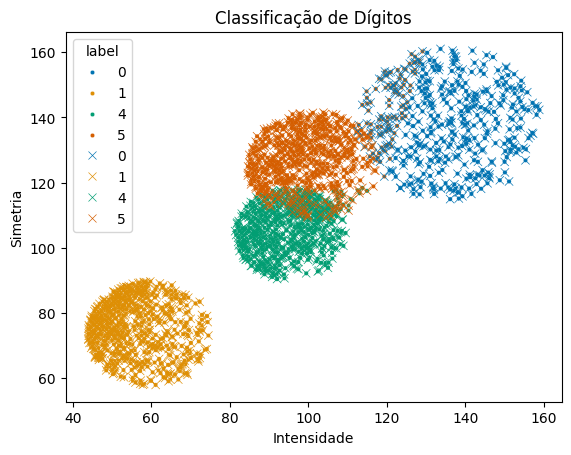

In [24]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado, data=train_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

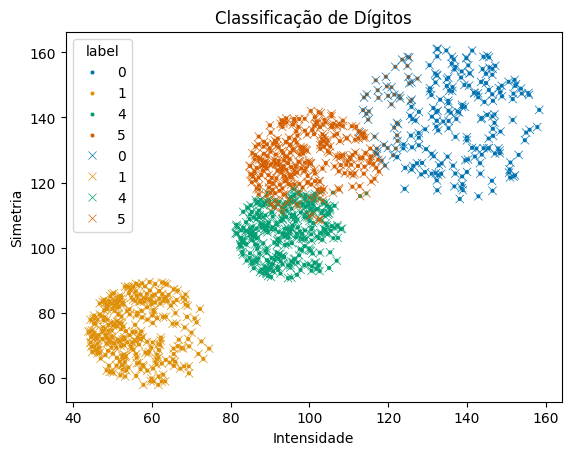

In [25]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_teste, data=test_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [26]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(digito_classificado[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

Ein = 0.08920402561756634


In [27]:
#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(digito_classificado_teste[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Eout = 0.06726457399103139


In [28]:
cm_train = confusion_matrix(train_redu['label'], digito_classificado)
print(cm_train)

[[322   0   0 103]
 [  0 608   0   0]
 [  0   0 561  16]
 [  0   0  76 500]]


In [29]:
# Matriz de confusão
cm_test = confusion_matrix(test_redu['label'], digito_classificado_teste)
print(cm_test)

[[174   0   0  44]
 [  0 292   0   0]
 [  0   0 310   4]
 [  0   0  27 264]]


In [30]:
print(classification_report(train_redu['label'].tolist(), digito_classificado))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       425
           1       1.00      1.00      1.00       608
           4       0.88      0.97      0.92       577
           5       0.81      0.87      0.84       576

    accuracy                           0.91      2186
   macro avg       0.92      0.90      0.91      2186
weighted avg       0.92      0.91      0.91      2186



In [31]:
print(classification_report(test_redu['label'].tolist(), digito_classificado_teste))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.92      0.99      0.95       314
           5       0.85      0.91      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



## Perceptron

In [32]:
class PocketPLA():
  def __init__(self):
    self.w = None

  def get_w(self):
    return self.w

  def set_w(self, w):
    self.w = w

  def execute(self, _X, y):
    X = np.array(_X)
    N = len(X)
    hasWrongClassifiedPoint = True
    bestError = len(y)

    self.w = np.zeros(len(X[0]))
    bestW = self.w
    for iter in range(N):

      #Testa se sign(wTXn) != Yn - ponto classificado errado
      for i in range(len(y)):
        if(np.sign(np.dot(self.w, X[i])) != y[i]):
          self.w = self.w + (y[i]*X[i])
          eIN = self.errorIN(X, y)
          if(bestError > eIN):
            bestError = eIN
            bestW = self.w
    self.w = bestW

  def getOriginalY(self, originalX):
    return (-self.w[0] - self.w[1]*originalX) / self.w[2]

  def h(self, x):
    return np.sign(np.dot(self.w, x))

  def errorIN(self, X, y):
    error = 0
    for i in range(len(y)):
      if(np.sign(np.dot(self.w, X[i])) != y[i]):
        error += 1

    return error

In [33]:
# utilizando os dados normalizados
X_train0_pla = np.hstack((np.ones((len(train_redu), 1)), train_redu[['i_normalizada', 's_normalizada']].values))
y_train0_pla = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_pla = np.hstack((np.ones((len(test_redu), 1)), test_redu[['i_normalizada', 's_normalizada']].values))
y_test0_pla = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])


# dados originais
X_train0_pla_rev = scaler.inverse_transform(train_redu[['i_normalizada', 's_normalizada']].values)
X_train0_pla_rev = np.hstack((np.ones((len(train_redu), 1)), X_train0_pla_rev))

X_test0_pla_rev = scaler.inverse_transform(test_redu[['i_normalizada', 's_normalizada']].values)
X_test0_pla_rev = np.hstack((np.ones((len(test_redu), 1)), X_test0_pla_rev))

In [34]:
pla0 = PocketPLA()
pla0.execute(X_train0_pla, y_train0_pla)

In [35]:
# Predição do Dígito com Pocket PLA
y_pla0 = []
for i in range(len(X_train0_pla)):
  y_pla0.append(pla0.h(X_train0_pla[i]))

In [36]:
xmin = X_train0_pla_rev[:,1].min()
xmax = X_train0_pla_rev[:,1].max()

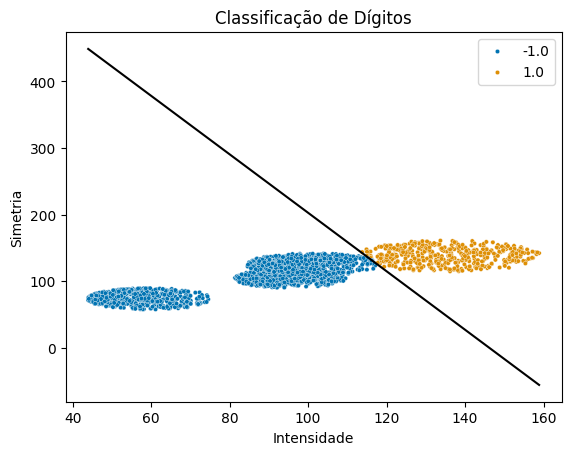

In [37]:
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla0, data=train_redu, palette='colorblind', s=10)
#sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla0.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla0.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [38]:
def new_data(X, y_pred):
  indices_to_keep = []
  for i in range(len(X)):
    if(np.array(y_pred[i]) == -1):
      indices_to_keep.append(i)
  return X.iloc[indices_to_keep]

In [39]:
train_redu_0_pla = new_data(train_redu, y_pla0)
train_redu_0_pla

,label,intensidade,simetria,i_normalizada,s_normalizada
92,0,114.329412,130.901961,0.612446,0.708115
139,0,112.878431,137.670588,0.599816,0.773747
257,0,112.592157,135.717647,0.597324,0.754810
277,0,112.745098,135.662745,0.598655,0.754278
386,0,116.486275,128.917647,0.631221,0.688874
...,...,...,...,...,...
2181,5,105.686275,133.890196,0.537209,0.737090
2182,5,113.050980,116.698039,0.601318,0.570386
2183,5,110.725490,133.019608,0.581075,0.728649
2184,5,99.305882,132.133333,0.481669,0.720055


In [40]:
X_train1_pla = train_redu_0_pla[['i_normalizada', 's_normalizada']].values
y_train1_pla = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0_pla['label']])

# adicionar o 1 para o bias
X_train1_pla = np.hstack((np.ones((len(X_train1_pla), 1)), X_train1_pla))

# dados originais
X_train1_pla_rev = scaler.inverse_transform(train_redu_0_pla[['i_normalizada', 's_normalizada']].values)
X_train1_pla_rev = np.hstack((np.ones((len(train_redu_0_pla), 1)), X_train1_pla_rev))

In [41]:
pla1 = PocketPLA()
pla1.execute(X_train1_pla, y_train1_pla)

In [42]:
y_pla1 = []
for i in range(len(X_train1_pla)):
  y_pla1.append(pla1.h(X_train1_pla[i]))

In [43]:
xmin = X_train1_pla_rev[:,1].min()
xmax = X_train1_pla_rev[:,1].max()

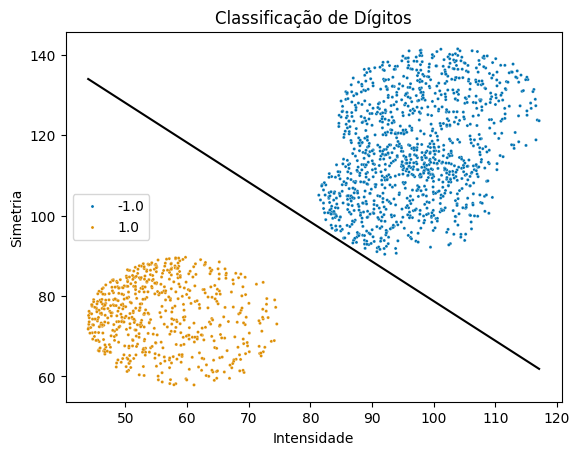

In [44]:
#sns.scatterplot(x='intensidade', y='simetria', hue=y_train1_pla, data=train_redu_0_pla, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla1, data=train_redu_0_pla, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla1.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla1.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [45]:
train_redu_1_pla = new_data(train_redu_0_pla, y_pla1)

In [46]:
X_train4_pla = train_redu_1_pla[['i_normalizada', 's_normalizada']].values
y_train4_pla = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1_pla['label']])

# adicionar o 1 para o bias
X_train4_pla = np.hstack((np.ones((len(X_train4_pla), 1)), X_train4_pla))

# dados originais
X_train4_pla_rev = scaler.inverse_transform(train_redu_1_pla[['i_normalizada', 's_normalizada']].values)
X_train4_pla_rev = np.hstack((np.ones((len(train_redu_1_pla), 1)), X_train4_pla_rev))

In [47]:
pla4 = PocketPLA()
pla4.execute(X_train4_pla, y_train4_pla)

In [48]:
y_pla4 = []
for i in range(len(X_train4_pla)):
  y_pla4.append(pla4.h(X_train4_pla[i]))

In [49]:
xmin = X_train4_pla_rev[:,1].min()
xmax = X_train4_pla_rev[:,1].max()

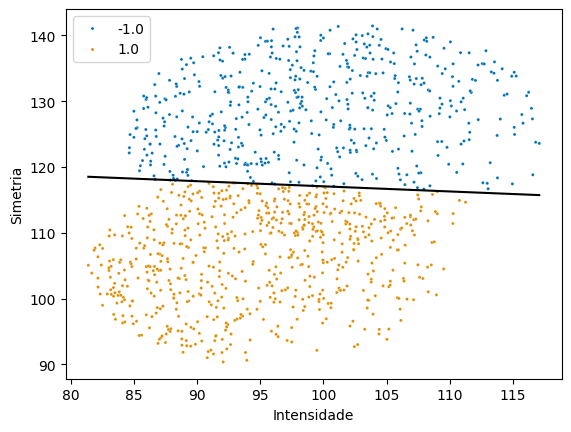

In [50]:
#sns.scatterplot(x='intensidade', y='simetria', hue=y_train4_pla, data=train_redu_1_pla, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=y_pla4, data=train_redu_1_pla, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)

# necessário para obter os dados originais
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = pla4.getOriginalY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = pla4.getOriginalY(x)
plt.plot(x, y, color='black')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.show()

In [51]:
def f0(x):
    pred = pla0.h(x)
    return np.array(pred)

def f1(x):
    pred = pla1.h(x)
    return np.array(pred)

def f4(x):
    pred = pla4.h(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    

# classificando com os dados de treino
# Ein
digito_classificado_pla = []
for i in range(len(X_train0_pla)):
  imagem_teste = X_train0_pla[i]
  digito_classificado_pla.append(classificar_digito(imagem_teste))
print(digito_classificado_pla)

# classificando com os dados de teste
# Eout
digito_classificado_teste_pla = []
for i in range(len(X_test0_pla)):
  imagem_teste = X_test0_pla[i]
  digito_classificado_teste_pla.append(classificar_digito(imagem_teste))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

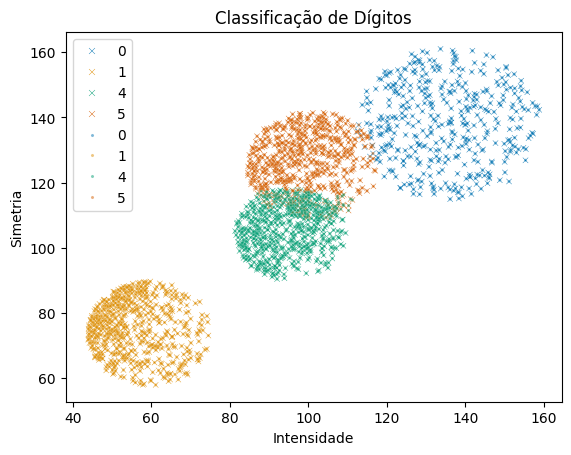

In [52]:
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x', s=15)
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_pla, data=train_redu, palette='colorblind', s=5, alpha=0.5)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

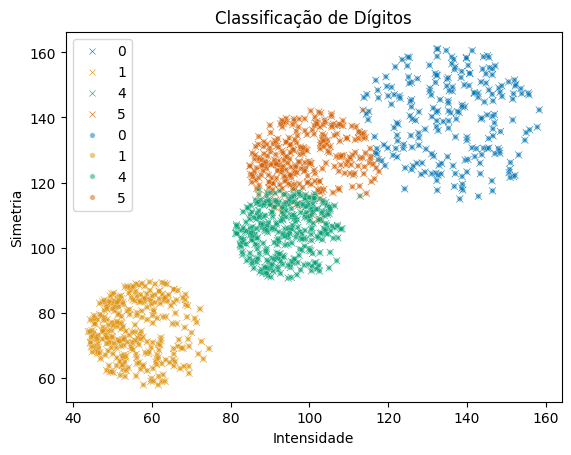

In [53]:
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x', s=25)
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_teste_pla, data=test_redu, palette='colorblind', s=15, alpha=0.5)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [54]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(digito_classificado_pla[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(digito_classificado_teste_pla[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.04117108874656908
Eout = 0.03228699551569507


In [55]:
cm_train = confusion_matrix(train_redu['label'], digito_classificado_pla)
print(cm_train)

[[418   0   0   7]
 [  0 608   0   0]
 [  0   0 572   5]
 [  0   0  78 498]]


In [56]:
# Matriz de confusão
cm_test = confusion_matrix(test_redu['label'], digito_classificado_teste_pla)
print(cm_test)

[[216   0   0   2]
 [  0 292   0   0]
 [  0   0 312   2]
 [  1   0  31 259]]


In [57]:
print(classification_report(train_redu['label'].tolist(), digito_classificado_pla))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       425
           1       1.00      1.00      1.00       608
           4       0.88      0.99      0.93       577
           5       0.98      0.86      0.92       576

    accuracy                           0.96      2186
   macro avg       0.96      0.96      0.96      2186
weighted avg       0.96      0.96      0.96      2186



In [58]:
print(classification_report(test_redu['label'].tolist(), digito_classificado_teste_pla))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.98      0.89      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



## Regressão Logística

In [59]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample

class LogisticRegression_:
  def __init__(self, eta=0.1, tmax=1000, bs=1000000):
    self.eta = eta
    self.tmax = tmax
    self.batch_size = bs

  # Infere o vetor w da funçao hipotese
  #Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
  def fit(self, _X, _y):
    X = np.array(_X)
    y = np.array(_y)

    N = X.shape[0]
    d = X.shape[1]
    self.w = np.zeros(d)

    for t in range(self.tmax):
      #grad_t = -1 / N * np.sum((_y @ _X) / (1 + np.exp(_y @ w @ t @ _X)))
      grad_t = (1 / N) * X.T.dot(self.predict_prob(X) - y)

      if LA.norm(grad_t) < 1e-3:
        break

      self.w -= self.eta * grad_t

  #funcao hipotese inferida pela regressa logistica
  def predict_prob(self, X):
    s = np.dot(X, self.w)
    prob = np.exp(s) / (1 + np.exp(s))
    return prob

  #Predicao por classificação linear
  def predict(self, X):
    prob = self.predict_prob(X)
    y = np.where(prob >= 0.5, 1, -1)
    return y

  def getW(self):
    return self.w

  def getRegressionY(self, regressionX, shift=0):
    return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [60]:
import numpy as np
from numpy import linalg as LA
import random

# joão paulo's version

class LogisticRegressionJ_:
    def __init__(self, eta=0.1, tmax=1000, bs=12):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = bs

    def fit(self, _X, _y):
        X = np.array(_X)
        y = np.array(_y)
        N = X.shape[0]
        d = X.shape[1]
        w = np.zeros(d, dtype=float)
        self.w = []

        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=float)

            # Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N), self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            # Computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))

            gt = vsoma / self.batch_size
            # Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001:
                break
            w = w + (self.eta * gt)

        self.w = w

    def predict_prob(self, X):
        #ATS
        s = np.dot(X, self.w)
        prob = np.exp(s) / (1 + np.exp(s))
        return prob
        
        #return [(1 / (1 + np.exp(-(self.w.T @ x)))) for x in X]

    def predict(self, X):
        # ATS
        prob = self.predict_prob(X)
        y = np.where(prob >= 0.5, 1, -1)
        return y
    
        #return [1 if (1 / (1 + np.exp(-(self.w.T @ x)))) >= 0.5 else -1 for x in X]

    def getW(self):
        return self.w

    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0] + shift - self.w[1] * regressionX) / self.w[2]

In [61]:
# utilizando os dados normalizados
X_train0_log = np.hstack((np.ones((len(train_redu), 1)), train_redu[['i_normalizada', 's_normalizada']].values))
y_train0_log = np.array([1 if y_ == 0 else -1 for y_ in train_redu['label']])

X_test0_log = np.hstack((np.ones((len(test_redu), 1)), test_redu[['i_normalizada', 's_normalizada']].values))
y_test0_log = np.array([1 if y_ == 0 else -1 for y_ in test_redu['label']])


# dados originais
X_train0_log_rev = scaler.inverse_transform(train_redu[['i_normalizada', 's_normalizada']].values)
X_train0_log_rev = np.hstack((np.ones((len(train_redu), 1)), X_train0_log_rev))

X_test0_log_rev = scaler.inverse_transform(test_redu[['i_normalizada', 's_normalizada']].values)
X_test0_log_rev = np.hstack((np.ones((len(test_redu), 1)), X_test0_log_rev))

In [62]:
LR0 = LogisticRegressionJ_(0.1, 1000)

LR0.fit(X_train0_log, y_train0_log)

pred_log0 = LR0.predict(X_train0_log)

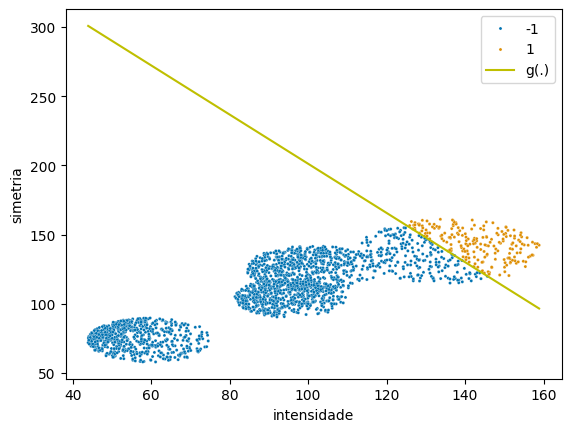

In [63]:
# plotagem
xmin = X_train0_log_rev[:,1].min()
xmax = X_train0_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train0_log, data=train_redu, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=LR0.predict(X_train0_log), data=train_redu, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR0.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR0.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [64]:
train_redu_0_log = new_data(train_redu, pred_log0)

In [65]:
X_train1_log = train_redu_0_log[['i_normalizada', 's_normalizada']].values
X_train1_log = np.hstack((np.ones((len(X_train1_log), 1)), X_train1_log))
   
y_train1_log = np.array([1 if y_ == 1 else -1 for y_ in train_redu_0_log['label']])

# dados originais
X_train1_log_rev = scaler.inverse_transform(train_redu_0_log[['i_normalizada', 's_normalizada']].values)
X_train1_log_rev = np.hstack((np.ones((len(train_redu_0_log), 1)), X_train1_log_rev))

In [66]:
LR1 = LogisticRegressionJ_(0.1, 1000)
LR1.fit(X_train1_log, y_train1_log)
pred_log1 = LR1.predict(X_train1_log)
pred_log1[:5]

array([-1, -1, -1, -1, -1])

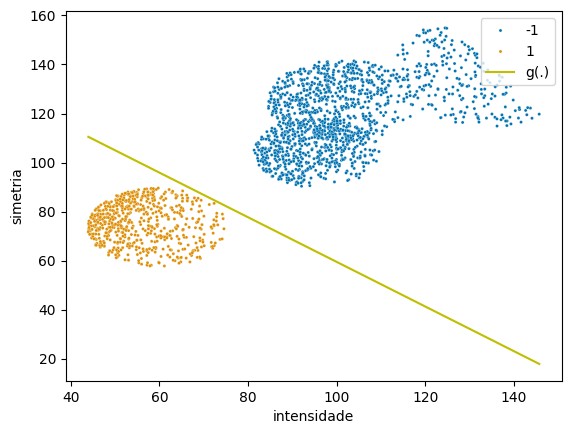

In [67]:
# dados originais
xmin = X_train1_log_rev[:,1].min()
xmax = X_train1_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train1_log, data=train_redu_0_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log1, data=train_redu_0_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR1.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR1.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [68]:
train_redu_1_log = new_data(train_redu_0_log, pred_log1)

In [69]:
X_train4_log = train_redu_1_log[['i_normalizada', 's_normalizada']].values
X_train4_log = np.hstack((np.ones((len(X_train4_log), 1)), X_train4_log))

y_train4_log = np.array([1 if y_ == 4 else -1 for y_ in train_redu_1_log['label']])

# dados originais
X_train4_log_rev = scaler.inverse_transform(train_redu_1_log[['i_normalizada', 's_normalizada']].values)
X_train4_log_rev = np.hstack((np.ones((len(train_redu_1_log), 1)), X_train4_log_rev))

In [70]:
LR4 = LogisticRegressionJ_(0.1, 1000)
LR4.fit(X_train4_log, y_train4_log)
pred_log4 = LR4.predict(X_train4_log)

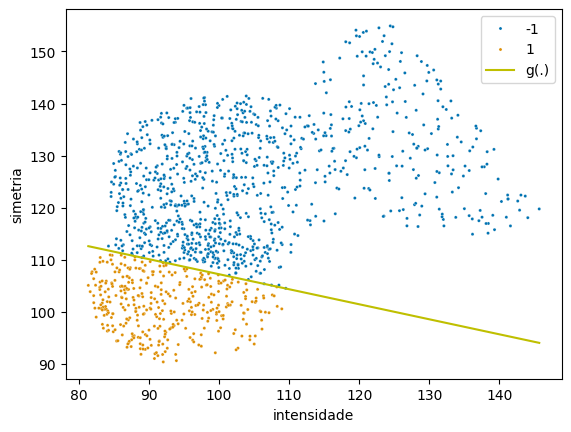

In [71]:
xmin = X_train4_log_rev[:,1].min()
xmax = X_train4_log_rev[:,1].max()

#sns.scatterplot(x='intensidade', y='simetria', hue=y_train4_log, data=train_redu_1_log, palette='colorblind', marker='x')
sns.scatterplot(x='intensidade', y='simetria', hue=pred_log4, data=train_redu_1_log, palette='colorblind', s=5)

x = np.linspace(xmin, xmax, 100)
x_normalized = scaler.transform(np.column_stack((x, np.zeros_like(x))))[:, 0]
y_normalized = LR4.getRegressionY(x_normalized)
y = scaler.inverse_transform(np.column_stack((x, y_normalized)))[:, 1]

#y = LR4.getRegressionY(x)
plt.plot(x, y, 'y-', label='g(.)')
plt.legend(loc='upper right')
plt.show()

In [83]:
def f0(x):
    pred = LR0.predict(x)
    return np.array(pred)

def f1(x):
    pred = LR1.predict(x)
    return np.array(pred)

def f4(x):
    pred = LR4.predict(x)
    return np.array(pred)

def classificar_digito(x):
    if f0(x) == 1:
        return 0
    elif f1(x) == 1:
        return 1
    elif f4(x) == 1:
        return 4
    else:
        return 5
    
# classificando com os dados de treino
# Ein
digito_classificado_log = []
for i in range(len(X_train0_log)):
  imagem_teste = X_train0_log[i]
  digito_classificado_log.append(classificar_digito(imagem_teste))

# classificando com os dados de teste
# Eout
digito_classificado_teste_log = []
for i in range(len(X_test0_log)):
  imagem_teste = X_test0_log[i]
  digito_classificado_teste_log.append(classificar_digito(imagem_teste))

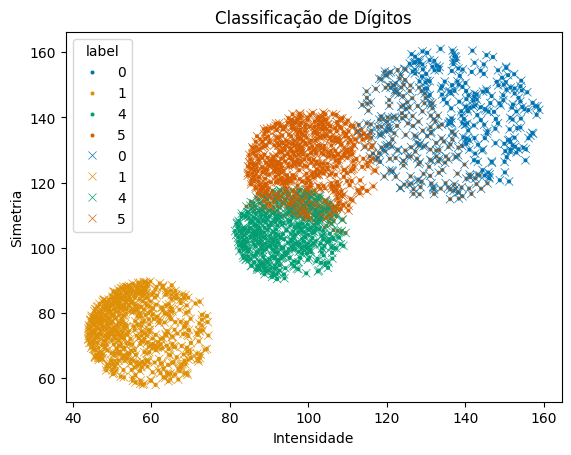

In [85]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_log, data=train_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

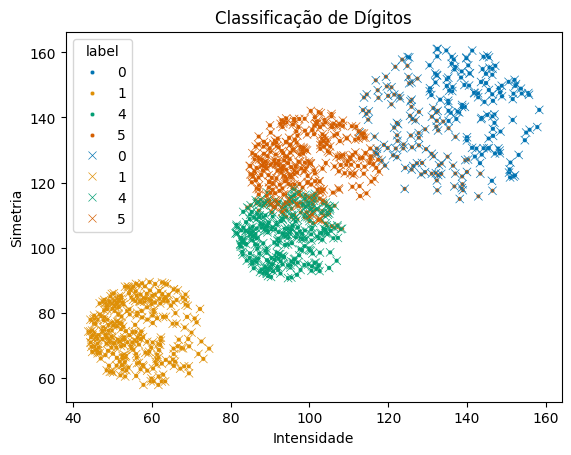

In [86]:
sns.scatterplot(x='intensidade', y='simetria', hue=digito_classificado_teste_log, data=test_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

In [89]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(digito_classificado_log[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(digito_classificado_teste_log[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.19762122598353157
Eout = 0.18385650224215247


In [90]:
print(classification_report(train_redu['label'].tolist(), digito_classificado_log))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       425
           1       1.00      1.00      1.00       608
           4       1.00      0.64      0.78       577
           5       0.57      1.00      0.73       576

    accuracy                           0.80      2186
   macro avg       0.89      0.78      0.79      2186
weighted avg       0.89      0.80      0.80      2186



In [91]:
print(classification_report(test_redu['label'].tolist(), digito_classificado_teste_log))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       218
           1       1.00      1.00      1.00       292
           4       1.00      0.67      0.80       314
           5       0.59      1.00      0.74       291

    accuracy                           0.82      1115
   macro avg       0.90      0.80      0.81      1115
weighted avg       0.89      0.82      0.82      1115



In [92]:
cm_train = confusion_matrix(train_redu['label'], digito_classificado_log)
print(cm_train)

[[203   0   0 222]
 [  0 608   0   0]
 [  0   0 367 210]
 [  0   0   0 576]]


In [93]:
cm_test = confusion_matrix(test_redu['label'], digito_classificado_teste_log)
print(cm_test)

[[118   0   0 100]
 [  0 292   0   0]
 [  0   0 209 105]
 [  0   0   0 291]]
